目前使用LOP為定義之實驗數據採用18筆

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing as pre
from scipy import stats

In [2]:
# TIP = pd.read_csv(os.path.join("/root/LR_ML", "0507.xlsx"))
# TIP = pd.read_excel('0507.xlsx', index_col=None)
# TIP = pd.read_csv(os.path.join('/root/LR_ML', 'Data_Sorted.csv'), error_bad_lines=False)
os.getcwd()

'/root/LR_ML'

In [3]:
datafile = u"/root/LR_ML/newData5.xlsx"
TIP0 = pd.read_excel(datafile)

In [4]:
TIP = pd.DataFrame(TIP0)

In [5]:
TIP.head()

,SBPI,SBPL,DBPI,DBPL,BPMI,BPML,LOP,NOTE
0,133,140,85,88,83,94,140.0,NaN
1,135,128,89,92,92,90,140.0,NaN
2,113,110,64,68,70,75,120.0,NaN
3,116,118,73,71,72,77,120.0,NaN
4,114,123,71,73,83,78,120.0,NaN


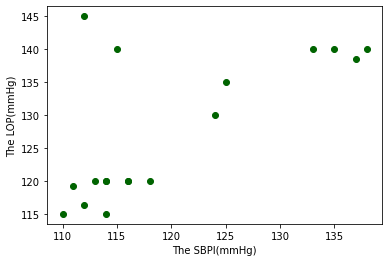

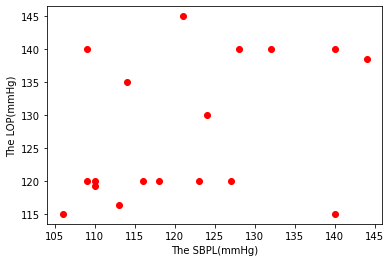

In [6]:
modTIP = TIP.drop(['NOTE'], axis = 1)
#繪製散點圖,examDf.jt爲X軸，examDf.hk爲Y軸
plt.scatter(modTIP.SBPI,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
#添加圖的標籤（x軸，y軸）
plt.xlabel("The SBPI(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像
plt.scatter(modTIP.SBPL,modTIP.LOP,color = 'red',label = "Exam Data")
plt.xlabel("The SBPL(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像

             SBPI        SBPL       DBPI       DBPL        BPMI       BPML  \
count   18.000000   18.000000  18.000000  18.000000   18.000000  18.000000   
mean   119.833333  121.333333  76.277778  73.555556   81.277778  79.111111   
std      9.623806   11.807276  11.118641  10.106621   11.333478   9.541790   
min    110.000000  106.000000  62.000000  60.000000   65.000000  64.000000   
25%    113.250000  110.750000  68.500000  66.500000   73.000000  74.250000   
50%    115.500000  119.500000  72.000000  72.000000   79.500000  77.500000   
75%    124.750000  127.750000  84.750000  78.250000   89.750000  86.500000   
max    138.000000  144.000000  99.000000  92.000000  107.000000  94.000000   

              LOP  
count   18.000000  
mean   127.450000  
std     10.730345  
min    115.000000  
25%    120.000000  
50%    120.000000  
75%    139.625000  
max    145.000000  
          SBPI      SBPL      DBPI      DBPL      BPMI      BPML       LOP
SBPI  1.000000  0.691092  0.424853  0.7678

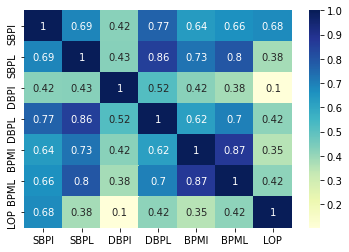

In [7]:
print(modTIP.describe())
rDf = modTIP.corr()#查看數據間的相關係數
print(rDf)
sns.heatmap(modTIP.corr(),annot=True, cmap="YlGnBu")

In [8]:
def t_test(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1)
    std2 = np.std(group2)
    nobs1 = len(group1)
    nobs2 = len(group2)
    
    modified_std1 = np.sqrt(np.float32(nobs1)/
                    np.float32(nobs1-1)) * std1
    modified_std2 = np.sqrt(np.float32(nobs2)/
                    np.float32(nobs2-1)) * std2
    (statistic, pvalue) = stats.ttest_ind_from_stats( 
               mean1=mean1, std1=modified_std1, nobs1=nobs1,   
               mean2=mean2, std2=modified_std2, nobs2=nobs2 )
    return statistic, pvalue

In [9]:
print(t_test(modTIP.SBPI, modTIP.SBPL))
print(t_test(modTIP.SBPI, modTIP.LOP))
print(t_test(modTIP.SBPL, modTIP.LOP))

(-0.4177880011528565, 0.6787289200688578)
(-2.2419315907264794, 0.03159958156984728)
(-1.6265324432082708, 0.11307062832266236)


自變量---源數據: (18,) ；  訓練集: (14,) ；  測試集: (4,)
因變量---源數據: (18,) ；  訓練集: (14,) ；  測試集: (4,)


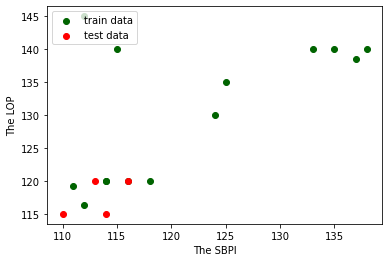

In [10]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train,X_test,Y_train,Y_test = train_test_split(modTIP.SBPI,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBPI.shape, "；  訓練集:",X_train.shape, "；  測試集:",X_test.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train.shape, "；  測試集:",Y_test.shape)
#散點圖
plt.scatter(X_train, Y_train, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test, Y_test, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPI")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

自變量---源數據: (18,) ；  訓練集: (14,) ；  測試集: (4,)
因變量---源數據: (18,) ；  訓練集: (14,) ；  測試集: (4,)


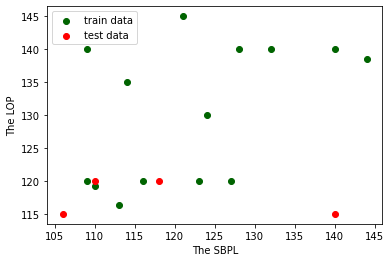

In [11]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(modTIP.SBPL,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBPL.shape, "；  訓練集:",X_train2.shape, "；  測試集:",X_test2.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train2.shape, "；  測試集:",Y_test2.shape)
#散點圖
plt.scatter(X_train2, Y_train2, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test2, Y_test2, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPL")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

In [12]:
# plt.scatter(modTIP.SBP1, modTIP.TIP, color="darkgreen", label="分布")

In [13]:
# X_1 = np.array([1 for i in range(28)])
# x_train = np.array(X_train)
# x = np.zeros((28,2))
# x[:,0] = X_1
# x[:,1] = x_train
# #線性迴歸訓練
# model = LinearRegression()
# model.fit(x,Y_train)#調用線性迴歸包
# a  = model.intercept_#截距
# b = model.coef_#迴歸係數
# #訓練數據的預測值
# y_train_pred = model.predict(x)
# #繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
# plt.plot(X_train, y_train_pred, color='blue', linewidth=2, label="best line")
# #測試數據散點圖
# plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
# plt.scatter(X_test, Y_test, color='red', label="test data")
# #添加圖標標籤
# plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
# plt.xlabel("The SBP")#添加 X 軸名稱
# plt.ylabel("The TIP")#添加 Y 軸名稱
# plt.show()#顯示圖像
# print("擬合參數:截距",a,",迴歸係數：",b)
# print("最佳擬合線: Y = ",round(a,2),"+",round(b[1],2),"* X")
# #顯示線性方程，並限制參數的小數位爲兩位

In [14]:
q = np.array(X_train)#q原先shape是(28,0)
np.shape(q)
q = np.reshape(q, (14,1))#reshape換成(28,1)

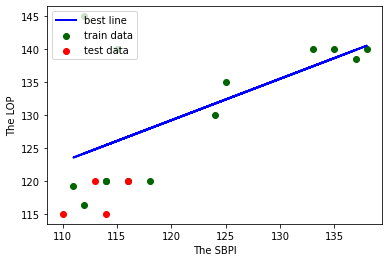

擬合參數:截距 53.73418006430869 ,迴歸係數： [0.62900322]
最佳擬合線: Y =  53.73 + 0.63 * X


In [15]:
model = LinearRegression()
model.fit(q,Y_train)#調用線性迴歸包
# model.fit(X_train,Y_train)
a  = model.intercept_#截距
b = model.coef_#迴歸係數
#訓練數據的預測值
y_train_pred = model.predict(q)
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(X_train, y_train_pred, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
plt.scatter(X_test, Y_test, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPI")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a,",迴歸係數：",b)
print("最佳擬合線: Y = ",round(a,2),"+",round(b[0],2),"* X")
#顯示線性方程，並限制參數的小數位爲兩位

In [16]:
q2 = np.array(X_train2)#q原先shape是(28,0)
np.shape(q2)
q2 = np.reshape(q2, (14,1))#reshape換成(28,1)

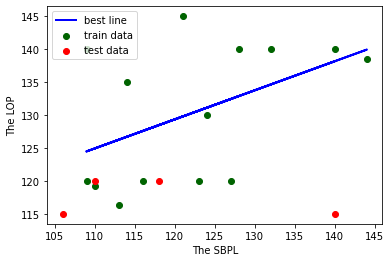

擬合參數:截距 76.36205512909979 ,迴歸係數： [0.44153873]
最佳擬合線: Y =  76.36 + 0.44 * X


In [17]:
model2 = LinearRegression()
model2.fit(q2,Y_train2)#調用線性迴歸包
# model.fit(X_train,Y_train)
a2  = model2.intercept_#截距
b2 = model2.coef_#迴歸係數
#訓練數據的預測值
y_train_pred2 = model2.predict(q2)
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(X_train2, y_train_pred2, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train2, Y_train2, color='darkgreen', label="train data")
plt.scatter(X_test2, Y_test2, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPL")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a2,",迴歸係數：",b2)
print("最佳擬合線: Y = ",round(a2,2),"+",round(b2[0],2),"* X")
#顯示線性方程，並限制參數的小數位爲兩位